#Menghubungkan ke Google Collab

In [62]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/praktikum_ml/praktikum07"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
df = pd.read_csv(path + "/data/dataset_satelit.csv")
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


Menhubungkan dengan google collab dan membaca file csv yang akan digunakan

#Import Library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import library yang dibutuhkan untuk latihan ini dimana menggunakan algoritma  linear regresion dan library lain sebaginya untuk mendukung

impor library penting untuk analisis data dan pemodelan:

pandas, numpy: manipulasi data

matplotlib, seaborn: visualisasi

statsmodels: regresi OLS

sklearn: pemisahan data dan evaluasi model.

#Eksplorasi Awal Data

In [65]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [91]:
# Mengecek nilai kosong
print("\nJumlah missing value tiap kolom:\n")
df.isnull().sum()


Jumlah missing value tiap kolom:



,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,1
Ca,0
Mg,0
Fe,0
Mn,0


In [67]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


Kode untuk Melihat Statistika deskriftif

In [68]:
df.columns

Index(['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5',
       'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe',
       'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh'],
      dtype='object')

Kode untuk melihat kolom kolom yang ada

#Analisis Korelasi

In [69]:
#Menghitung korelasi antar variabel
correlation = df.corr(numeric_only=True)
print("Matriks Korelasi:")
print(correlation)

Matriks Korelasi:
                 No  Longitude  Lattitude         N         P         K  \
No         1.000000   0.298329  -0.048248  0.057689  0.103043  0.184023   
Longitude  0.298329   1.000000  -0.954575 -0.695291 -0.284783  0.437909   
Lattitude -0.048248  -0.954575   1.000000  0.742794  0.314183 -0.449305   
N          0.057689  -0.695291   0.742794  1.000000  0.643212 -0.138219   
P          0.103043  -0.284783   0.314183  0.643212  1.000000  0.113762   
K          0.184023   0.437909  -0.449305 -0.138219  0.113762  1.000000   
Ca         0.063824  -0.004674   0.038478  0.035696  0.114508 -0.088435   
Fe        -0.291045  -0.511479   0.431759  0.338775  0.214960 -0.192682   
Mn        -0.339729  -0.538369   0.485494  0.383059  0.084432 -0.366838   
Cu         0.098028   0.137537  -0.114330  0.028677 -0.016710  0.200614   
Zn        -0.489785  -0.371780   0.305065  0.186446 -0.000292 -0.312304   
B          0.007815  -0.159857   0.168161  0.122336  0.078215 -0.135192   
b12    

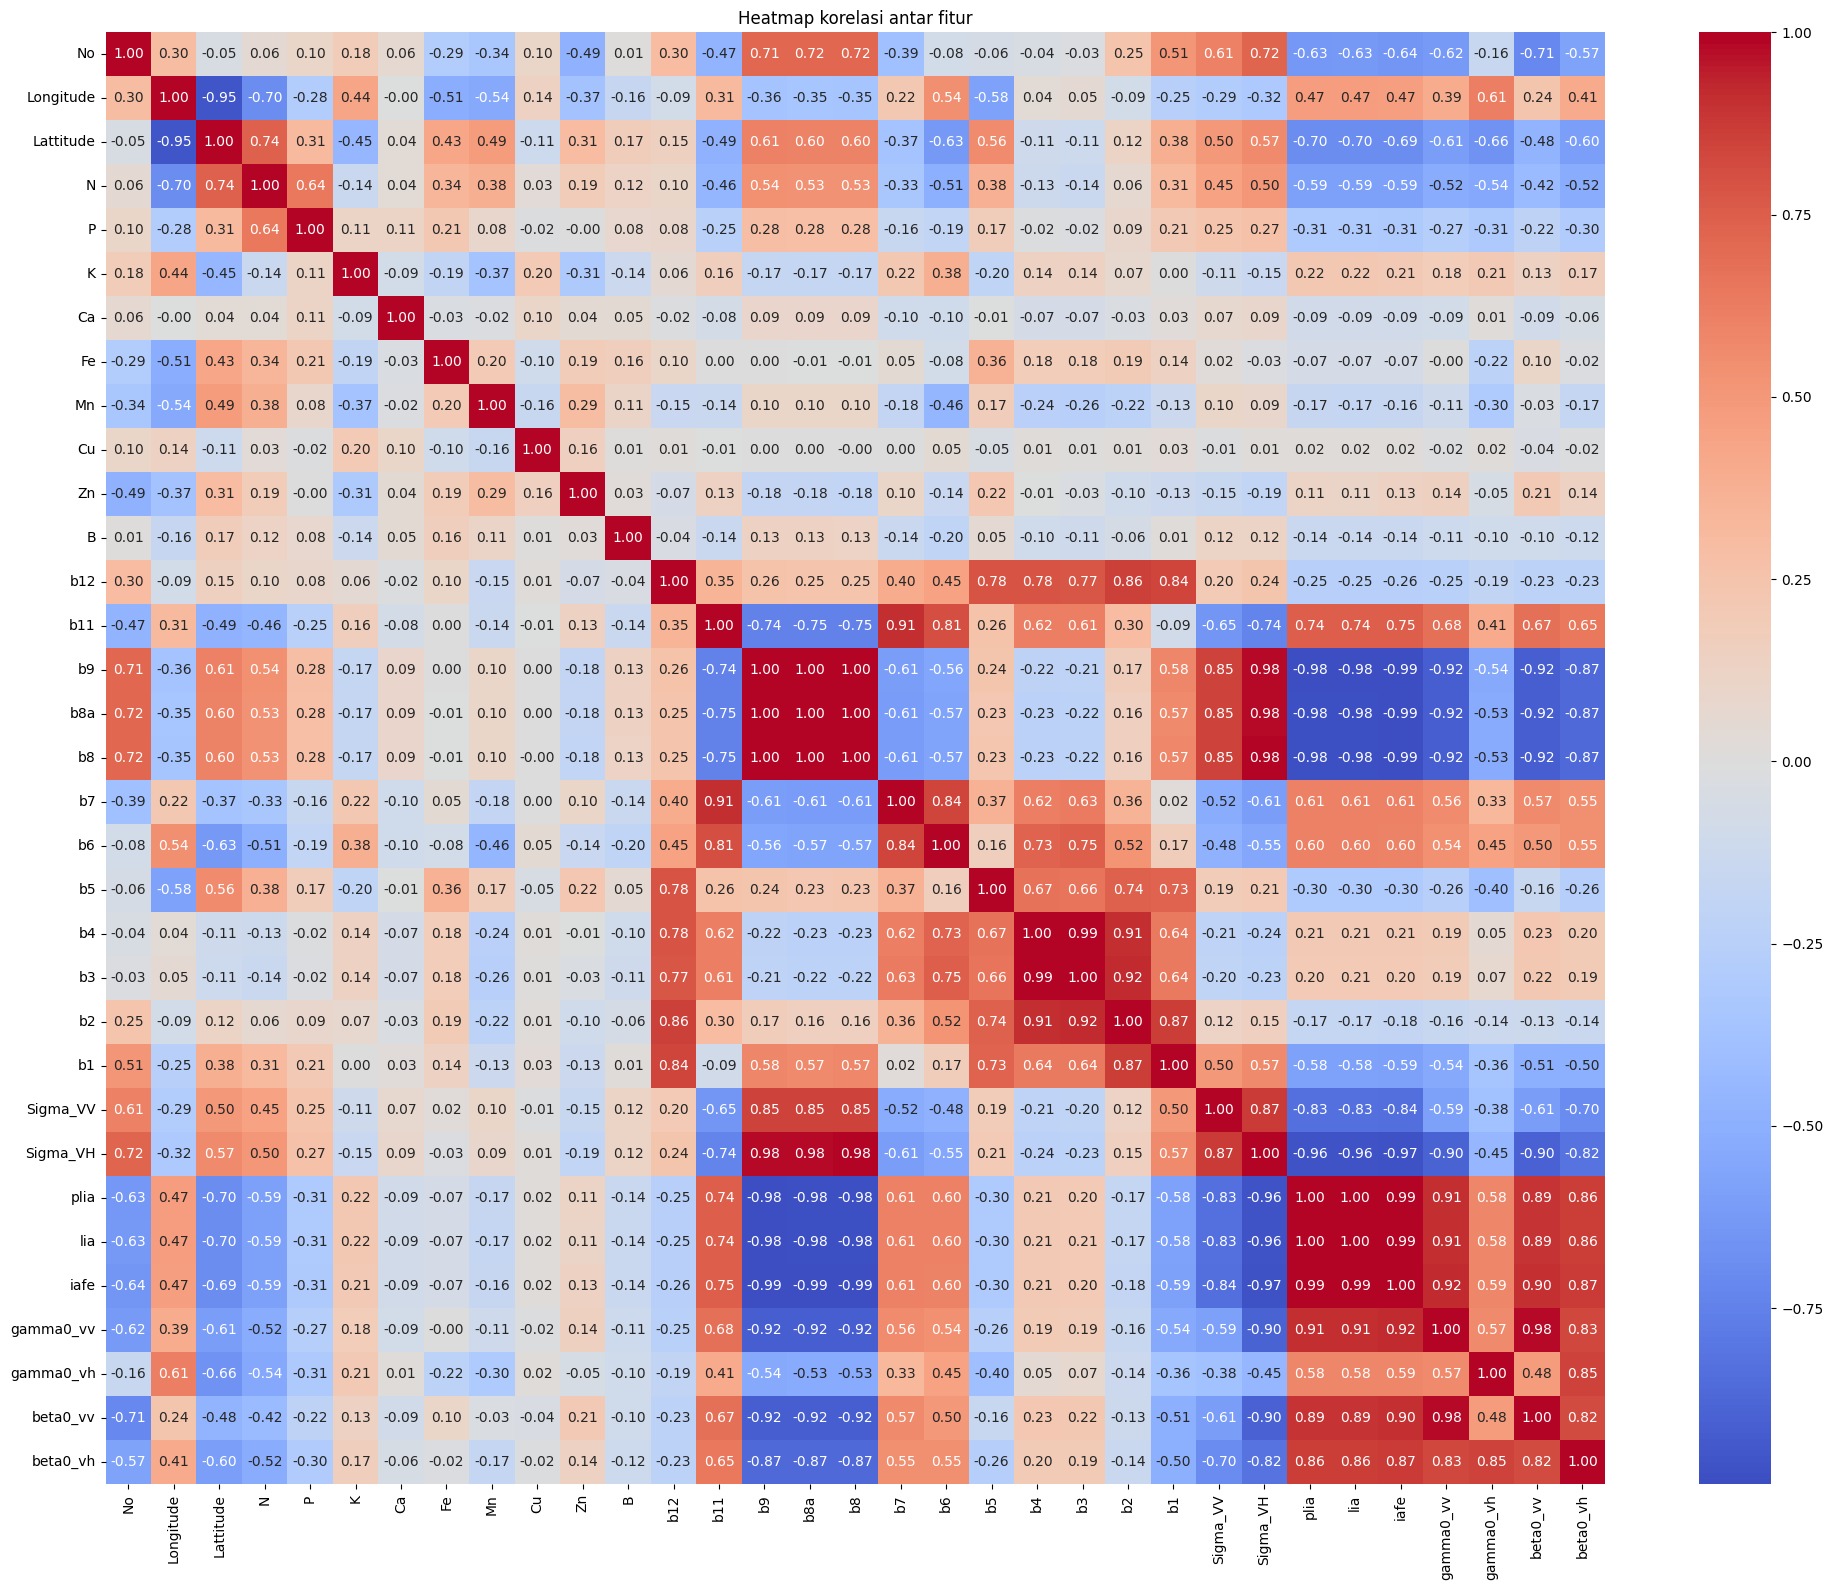

In [75]:
#Heatmap Korelasi
plt.figure(figsize=(20,16))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Heatmap korelasi antar fitur')
plt.tight_layout()
plt.show()

Menghitung korelasi antar variabel numerik dan menampilkannya dalam heatmap untuk melihat hubungan antar fitur.

#Spliting Data

In [79]:
# Pilih fitur (X) dan target (y)

X = df.drop(['No', 'Longitude','Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn',
       'Cu', 'Zn', 'B'], axis=1)
y = df['N']


# Split data ke data training dan testing 80 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Cetak Pembagian Data
print("Jumlah data training :", len(X_train))
print("Jumlah data testing :", len(X_test))


Jumlah data training : 475
Jumlah data testing : 119


#Membangun Model OLS

In [85]:
#Melakukan Imputasi missing value pada fitur dengan menggunakan median dari X_train
numeric_cols = X_train.select_dtypes(include=['number']).columns
for col in numeric_cols:
	median = X_train[col].median()
	X_train[col] = X_train[col].fillna(median)
	X_test[col] = X_test[col].fillna(median)

#Menambahkan konstanta
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

#kode agar semua matriks bertipe numerik float
X_train_const = X_train_const.astype(float)
X_test_const = X_test_const.astype(float)

In [84]:
# Bangun model OLS
model_ols = sm.OLS(y_train.astype(float), X_train_const)
results_ols = model_ols.fit()

# Menampilkan summary model
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     33.84
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           3.81e-79
Time:                        16:38:56   Log-Likelihood:                -9.2168
No. Observations:                 475   AIC:                             62.43
Df Residuals:                     453   BIC:                             154.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1702      1.239      4.172      0.0

#Evaluasi Model

In [86]:
# Prediksi pada data testing
y_pred = results_ols.predict(X_test_const)

# Hitung metrik evaluasi
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("===== Evaluasi Model OLS =====")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

===== Evaluasi Model OLS =====
R-squared (R²): 0.5544
Mean Squared Error (MSE): 0.0675
Root Mean Squared Error (RMSE): 0.2598
Mean Absolute Error (MAE): 0.2013


#Prediksi data

In [90]:
#Tambahkan konstanta dan latih model OLS
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_const).fit()

#Prediksi pada data uji
y_pred_test = model.predict(X_test_const)

#Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Red Edge": X_test["b5"].to_numpy() if "b5" in X_test else np.nan,
    "SWIR (Short Wave Infrared)": X_test["b7"].to_numpy() if "b7" in X_test else np.nan,
    "SWIR 2 (Short Wave Infrared)": X_test["b11"].to_numpy() if "b11" in X_test else np.nan,
    "Radar Backscatter": X_test["Sigma_VV"].to_numpy() if "Sigma_VV" in X_test else np.nan,
    "Sudut Lokal": X_test["plia"].to_numpy() if "plia" in X_test else np.nan,
    "Kadar Nitrogen Aktual": y_test.to_numpy().flatten(),
    "Kadar Nitrogen Prediksi": y_pred_test.to_numpy().flatten()
})

#Hitung selisih error dan akurasi
hasil["Selisih error"] = hasil["Kadar Nitrogen Prediksi"] - hasil["Kadar Nitrogen Aktual"]
denom = hasil["Kadar Nitrogen Aktual"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error"].abs() / denom)).clip(lower=0, upper=1) * 100
hasil

,Red Edge,SWIR (Short Wave Infrared),SWIR 2 (Short Wave Infrared),Radar Backscatter,Sudut Lokal,Kadar Nitrogen Aktual,Kadar Nitrogen Prediksi,Selisih error,Akurasi (%)
0,0.26650,0.32790,0.18810,0.19508,34.73067,2.69,2.292663,-0.397337,85.229112
1,0.14590,0.44620,0.20900,0.22341,36.34398,2.28,1.940017,-0.339983,85.088466
2,0.42270,0.42590,0.21130,0.21438,35.88374,2.48,2.318576,-0.161424,93.490959
3,0.45620,0.45400,0.22960,0.18671,33.54766,2.66,2.293833,-0.366167,86.234339
4,0.12750,0.41100,0.19030,0.21646,38.10647,2.46,1.935676,-0.524324,78.686033
...,...,...,...,...,...,...,...,...,...
114,0.23342,0.14065,0.03214,0.38030,0.34050,2.60,2.670039,0.070039,97.306191
115,0.32910,0.37090,0.16940,0.27992,32.31211,2.36,2.476398,0.116398,95.067867
116,0.23790,0.27860,0.17420,0.15018,35.83424,2.51,2.314854,-0.195146,92.225248
117,0.27440,0.34410,0.20910,0.18453,34.14715,2.21,2.436435,0.226435,89.754069


#Kesimpulan

Notebook ini melakukan analisis regresi linier (OLS) pada data satelit untuk memprediksi kadar Nitrogen (N) tanah berdasarkan fitur-fitur spektral seperti Red Edge, SWIR, Radar Backscatter, dan Sudut Lokal.

Model berhasil mengidentifikasi pola hubungan antara data spektral dan kadar Nitrogen, dengan hasil evaluasi yang menggambarkan seberapa baik model mampu memprediksi nilai aktual pada data uji. Model OLS dapat menjelaskan sebagian besar variasi kadar Nitrogen (dilihat dari nilai R² yang cukup tinggi). Beberapa fitur seperti Red Edge (b5) dan SWIR (b7, b11) kemungkinan memiliki pengaruh signifikan terhadap Nitrogen.